# Visualise the results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from main_functions import share_algorithm
from nab_functions import read_nab

In [2]:
scores = pd.read_csv("results/scores.csv")
losses_log = pd.read_csv("results/losses_log.csv")
losses_square = pd.read_csv("results/losses_square.csv")

## Predictions for the real data with known anomaly causes

In [3]:
scores_real = scores[scores["folder_name"] == "realKnownCause"]
file_list = [
    "_ec2_request_latency_system_failure.csv",
    "_machine_temperature_system_failure.csv",
    "_ambient_temperature_system_failure.csv",
]

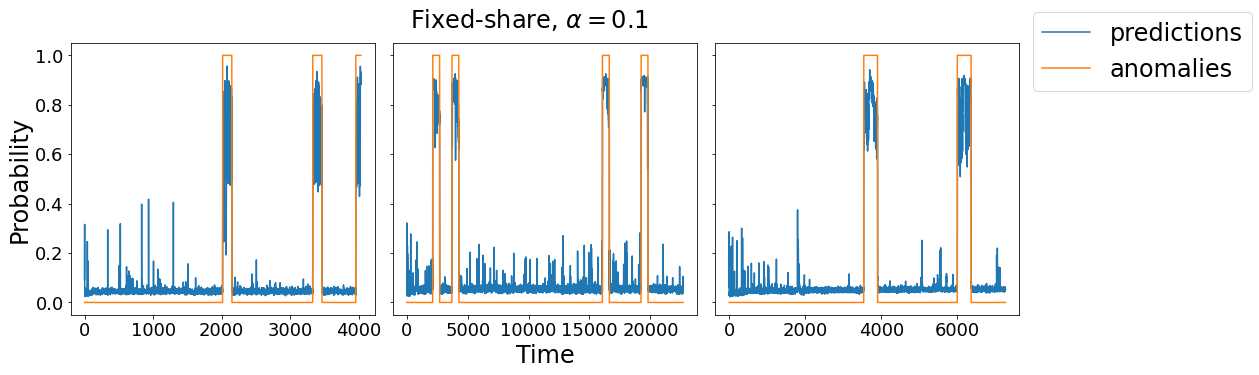

In [4]:
fig, axs = plt.subplots(1, len(file_list), figsize=(17, 5))
for i, _ in enumerate(file_list):
    axs[i].plot(scores_real[scores_real["file_name"] == file_list[i]]["score_Fixed10"].values, label = "predictions")
    axs[i].plot(scores_real[scores_real["file_name"] == file_list[i]]["label"].values, label = "anomalies")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=0)
for n, ax in enumerate(axs.flat):
    if n == 1:
        ax.set_xlabel("Time", fontsize = 24)
    ax.set_ylabel("Probability", fontsize = 24)
for ax in axs.flat:
    ax.label_outer()
    ax.tick_params(labelsize=18)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1), fontsize = 24)
fig.suptitle(r"Fixed-share, $\alpha = 0.1$", fontsize=24);

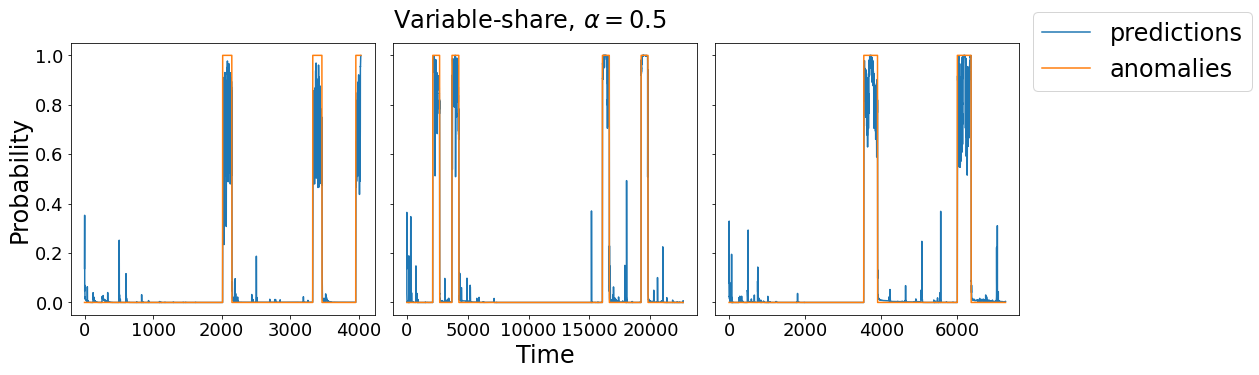

In [5]:
fig, axs = plt.subplots(1, len(file_list), figsize=(17, 5))
for i, _ in enumerate(file_list):
    axs[i].plot(
        scores_real[scores_real["file_name"] == file_list[i]]["score_Variable50"].values, label = "predictions"
    )
    axs[i].plot(scores_real[scores_real["file_name"] == file_list[i]]["label"].values, label = "anomalies")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=0)
for n, ax in enumerate(axs.flat):
    if n == 1:
        ax.set_xlabel("Time", fontsize = 24)
    ax.set_ylabel("Probability", fontsize = 24)
for ax in axs.flat:
    ax.label_outer()
    ax.tick_params(labelsize=18)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1), fontsize = 24)
fig.suptitle(r"Variable-share, $\alpha = 0.5$", fontsize=24);

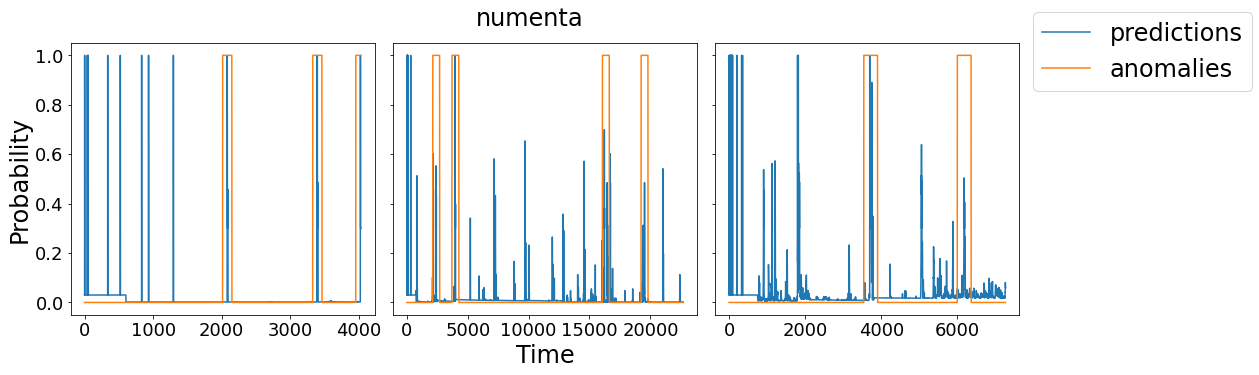

In [6]:
fig, axs = plt.subplots(1, len(file_list), figsize=(17, 5))
for i, _ in enumerate(file_list):
    axs[i].plot(scores_real[scores_real["file_name"] == file_list[i]]["score_numenta"].values, label = "predictions")
    axs[i].plot(scores_real[scores_real["file_name"] == file_list[i]]["label"].values, label = "anomalies")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=0)
for n, ax in enumerate(axs.flat):
    if n == 1:
        ax.set_xlabel("Time", fontsize = 24)
    ax.set_ylabel("Probability", fontsize = 24)
for ax in axs.flat:
    ax.label_outer()
    ax.tick_params(labelsize=18)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1), fontsize = 24)
fig.suptitle("numenta", fontsize=24);

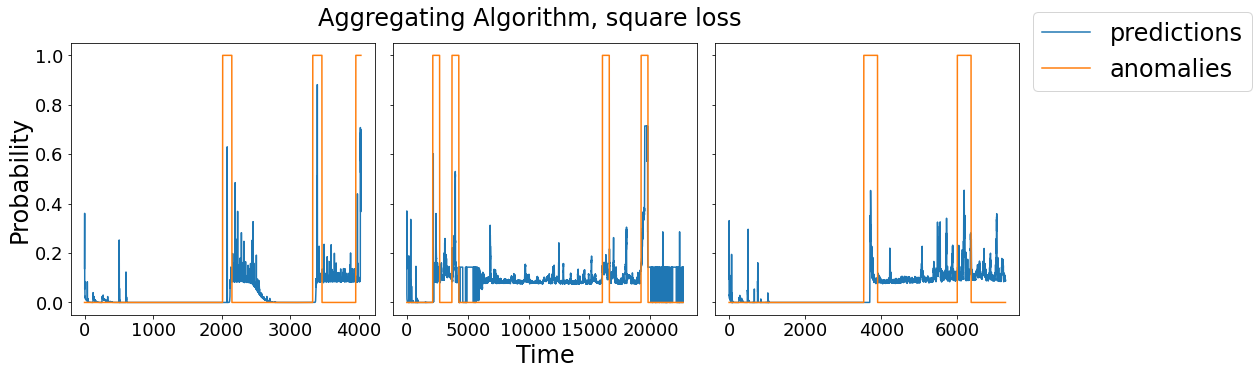

In [7]:
fig, axs = plt.subplots(1, len(file_list), figsize=(17, 5))
for i, _ in enumerate(file_list):
    axs[i].plot(scores_real[scores_real["file_name"] == file_list[i]]["score_Variable0"].values, label = "predictions")
    axs[i].plot(scores_real[scores_real["file_name"] == file_list[i]]["label"].values, label = "anomalies")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=0)
for n, ax in enumerate(axs.flat):
    if n == 1:
        ax.set_xlabel("Time", fontsize = 24)
    ax.set_ylabel("Probability", fontsize = 24)
for ax in axs.flat:
    ax.label_outer()
    ax.tick_params(labelsize=18)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1), fontsize = 24)
fig.suptitle("Aggregating Algorithm, square loss", fontsize=24);

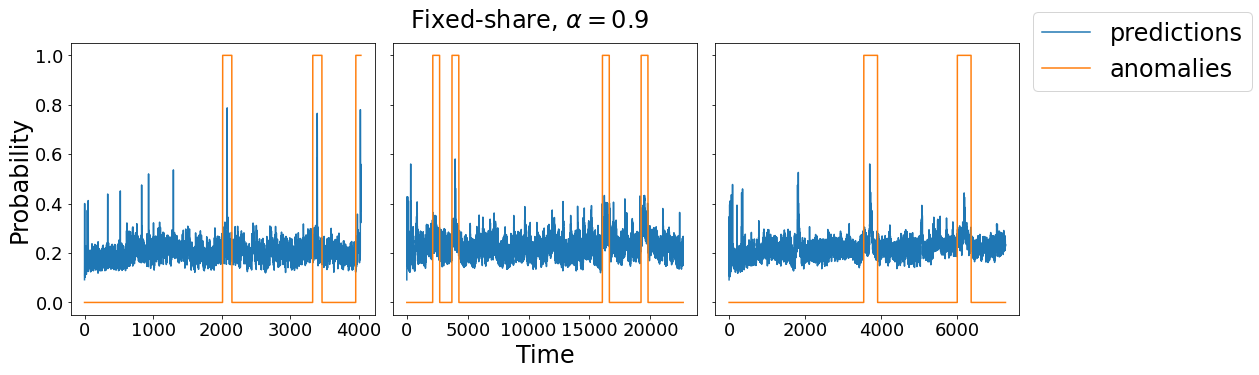

In [8]:
fig, axs = plt.subplots(1, len(file_list), figsize=(17, 5))
for i, _ in enumerate(file_list):
    axs[i].plot(scores_real[scores_real["file_name"] == file_list[i]]["score_Fixed90"].values, label = "predictions")
    axs[i].plot(scores_real[scores_real["file_name"] == file_list[i]]["label"].values, label = "anomalies")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.06, hspace=0)
for n, ax in enumerate(axs.flat):
    if n == 1:
        ax.set_xlabel("Time", fontsize = 24)
    ax.set_ylabel("Probability", fontsize = 24)
for ax in axs.flat:
    ax.label_outer()
    ax.tick_params(labelsize=18)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1), fontsize = 24)
fig.suptitle(r"Fixed-share, $\alpha = 0.9$", fontsize=24);

## Weights analysis for the real data with known anomaly causes of system failure

In [9]:
algorithm_list = [
    "knncad",
    "numentaTM",
    "twitterADVec",
    "skyline",
    "earthgeckoSkyline",
    "numenta",
    "bayesChangePt",
    "null",
    "expose",
    "relativeEntropy",
    "htmjava",
    "randomCutForest",
    "random",
    "contextOSE",
    "windowedGaussian",
]
FOLDER_NAME = "realKnownCause"
FILE_NAME = "_machine_temperature_system_failure.csv"

In [10]:
dt = read_nab(algorithm_list, FOLDER_NAME, FILE_NAME)
score_experts = np.array(dt.filter(regex="^score", axis=1))
assert score_experts.shape[1] == len(algorithm_list)
target = dt["label"].values

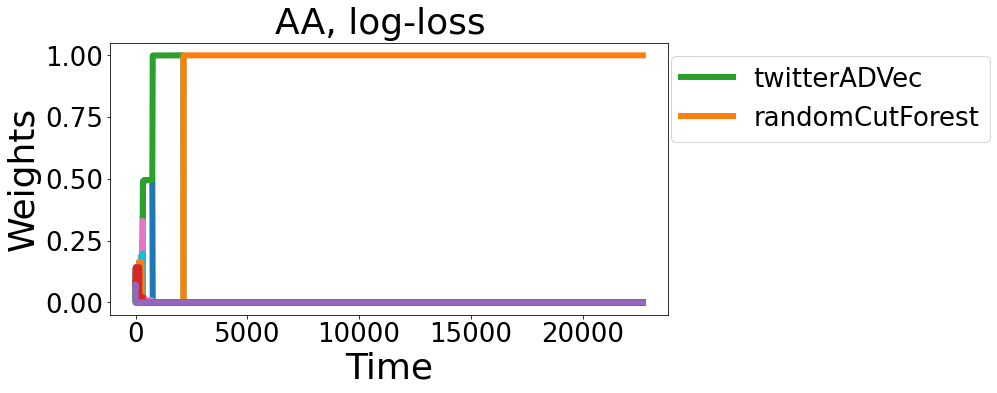

In [11]:
score_AA, loss_AA, loss_experts, weights_experts = share_algorithm(
    target, score_experts, share_type="Fixed", alpha=0
)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for i, _ in enumerate(algorithm_list):
    if max(weights_experts.T[i] > 0.5):
        plt.plot(weights_experts.T[i], linewidth=6, label=f"{algorithm_list[i]}")
    else:
        plt.plot(weights_experts.T[i], linewidth=6)
axs.legend(loc="upper right", bbox_to_anchor=(1.6, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=36)
axs.set_ylabel("Weights", fontsize=36)
axs.xaxis.set_tick_params(labelsize=26)
axs.yaxis.set_tick_params(labelsize=26)
plt.rcParams.update({"font.size": 36})
fig.suptitle("AA, log-loss", fontsize=36);

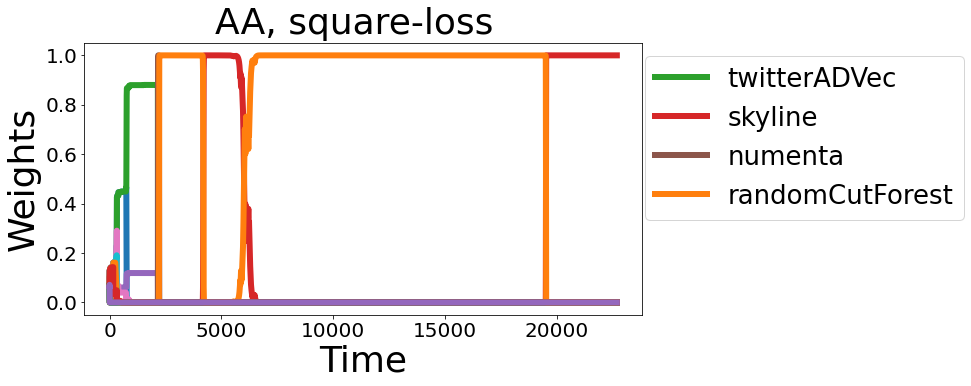

In [12]:
score_AA, loss_AA, loss_experts, weights_experts = share_algorithm(
    target, score_experts, share_type="Variable", alpha=0
)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for i, _ in enumerate(algorithm_list):
    if max(weights_experts.T[i] > 0.7):
        plt.plot(weights_experts.T[i], linewidth=6, label=f"{algorithm_list[i]}")
    else:
        plt.plot(weights_experts.T[i], linewidth=6)
axs.legend(loc="upper right", bbox_to_anchor=(1.6, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=36)
axs.set_ylabel("Weights", fontsize=36)
axs.xaxis.set_tick_params(labelsize=20)
axs.yaxis.set_tick_params(labelsize=20)
plt.rcParams.update({"font.size": 36})
fig.suptitle("AA, square-loss", fontsize=36);

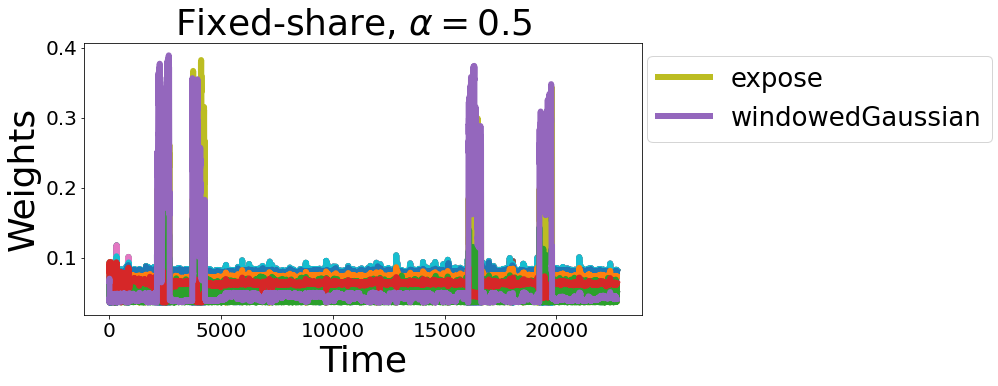

In [13]:
score_AA, loss_AA, loss_experts, weights_experts = share_algorithm(
    target, score_experts, share_type="Fixed", alpha=0.5
)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for i, _ in enumerate(algorithm_list):
    if max(weights_experts.T[i] > 0.3):
        plt.plot(weights_experts.T[i], linewidth=6, label=f"{algorithm_list[i]}")
    else:
        plt.plot(weights_experts.T[i], linewidth=6)
axs.legend(loc="upper right", bbox_to_anchor=(1.65, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=36)
axs.set_ylabel("Weights", fontsize=36)
axs.xaxis.set_tick_params(labelsize=20)
axs.yaxis.set_tick_params(labelsize=20)
plt.rcParams.update({"font.size": 36})
fig.suptitle(r"Fixed-share, $\alpha = 0.5$", fontsize=36);

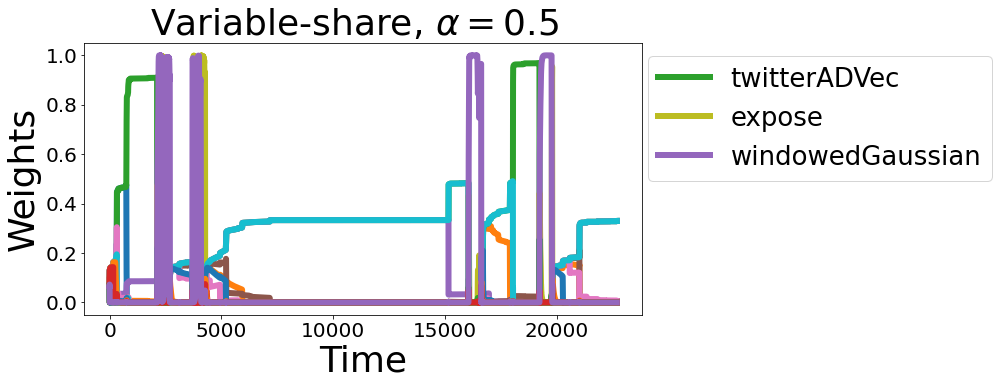

In [14]:
score_AA, loss_AA, loss_experts, weights_experts = share_algorithm(
    target, score_experts, share_type="Variable", alpha=0.5
)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for i, _ in enumerate(algorithm_list):
    if max(weights_experts.T[i] > 0.5):
        plt.plot(weights_experts.T[i], linewidth=6, label=f"{algorithm_list[i]}")
    else:
        plt.plot(weights_experts.T[i], linewidth=6)
axs.legend(loc="upper right", bbox_to_anchor=(1.65, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=36)
axs.set_ylabel("Weights", fontsize=36)
axs.xaxis.set_tick_params(labelsize=20)
axs.yaxis.set_tick_params(labelsize=20)
plt.rcParams.update({"font.size": 36})
fig.suptitle(r"Variable-share, $\alpha = 0.5$", fontsize=36);

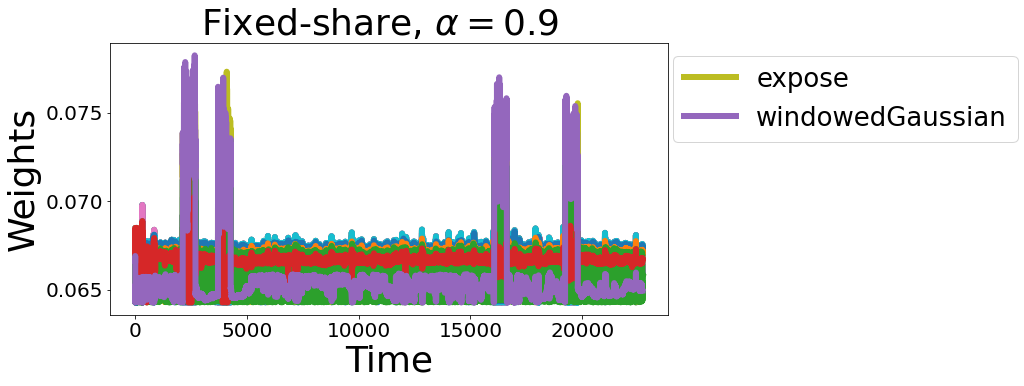

In [15]:
score_AA, loss_AA, loss_experts, weights_experts = share_algorithm(
    target, score_experts, share_type="Fixed", alpha=0.9
)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for i, _ in enumerate(algorithm_list):
    if max(weights_experts.T[i] > 0.075):
        plt.plot(weights_experts.T[i], linewidth=6, label=f"{algorithm_list[i]}")
    else:
        plt.plot(weights_experts.T[i], linewidth=6)
axs.legend(loc="upper right", bbox_to_anchor=(1.65, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=36)
axs.set_ylabel("Weights", fontsize=36)
axs.xaxis.set_tick_params(labelsize=20)
axs.yaxis.set_tick_params(labelsize=20)
plt.rcParams.update({"font.size": 36})
fig.suptitle(r"Fixed-share, $\alpha = 0.9$", fontsize=36);

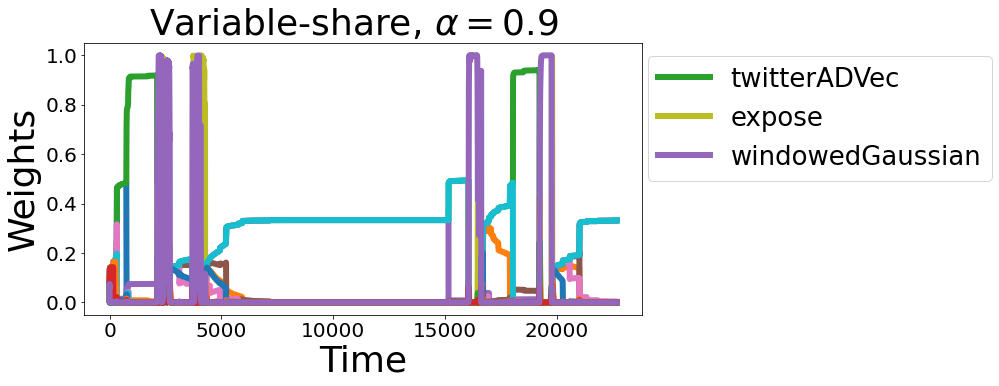

In [16]:
score_AA, loss_AA, loss_experts, weights_experts = share_algorithm(
    target, score_experts, share_type="Variable", alpha=0.9
)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for i, _ in enumerate(algorithm_list):
    if max(weights_experts.T[i] > 0.5):
        plt.plot(weights_experts.T[i], linewidth=6, label=f"{algorithm_list[i]}")
    else:
        plt.plot(weights_experts.T[i], linewidth=6)
axs.legend(loc="upper right", bbox_to_anchor=(1.65, 1), fontsize=26)
axs.set_xlabel("Time", fontsize=36)
axs.set_ylabel("Weights", fontsize=36)
axs.xaxis.set_tick_params(labelsize=20)
axs.yaxis.set_tick_params(labelsize=20)
plt.rcParams.update({"font.size": 36})
fig.suptitle(r"Variable-share, $\alpha = 0.9$", fontsize=36);

## Plot theoretical bounds

In [17]:
losses_log_art = losses_log[
    (losses_log["folder_name"] == "artificialNoAnomaly")
    & (losses_log["file_name"] == "_art_daily_perfect_square_wave.csv")
]
losses_square_art = losses_square[
    (losses_square["folder_name"] == "artificialNoAnomaly")
    & (losses_square["file_name"] == "_art_daily_perfect_square_wave.csv")
]
Losses_log_art = losses_log_art.filter(regex="^loss", axis=1).cumsum()
Losses_log_art.columns = [i.replace("loss", "Loss") for i in Losses_log_art.columns]
Losses_log_art = pd.merge(losses_log_art, Losses_log_art, left_index=True, right_index=True)
Losses_square_art = losses_square_art.filter(regex="^loss", axis=1).cumsum()
Losses_square_art.columns = [i.replace("loss", "Loss") for i in Losses_square_art.columns]
Losses_square_art = pd.merge(
    losses_square_art, Losses_square_art, left_index=True, right_index=True
)

### Log-loss

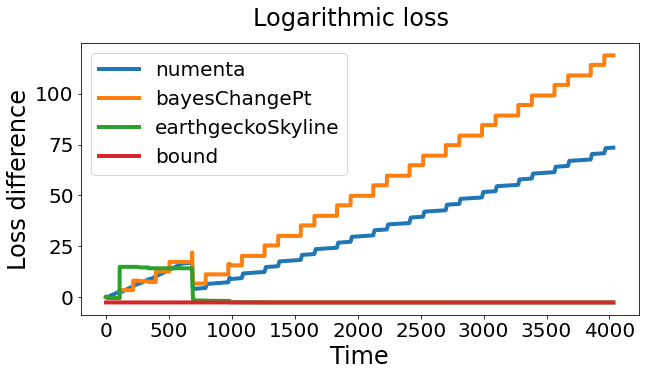

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for algo_ind in ["numenta", "bayesChangePt", "earthgeckoSkyline"]:
    axs.plot(
        Losses_log_art[f"Loss_{algo_ind}"].values - Losses_log_art["Loss_Fixed0"].values,
        label=f"{algo_ind}",
        linewidth=4,
    )
axs.plot(np.repeat(-np.log(15), Losses_log_art.shape[0]), linewidth=4, label="bound")
axs.legend(loc="upper left", fontsize=20)
axs.set_xlabel("Time", fontsize=24)
axs.set_ylabel("Loss difference", fontsize=24)
axs.xaxis.set_tick_params(labelsize=20)
axs.yaxis.set_tick_params(labelsize=20)
fig.suptitle("Logarithmic loss", fontsize=24);

### Square-loss

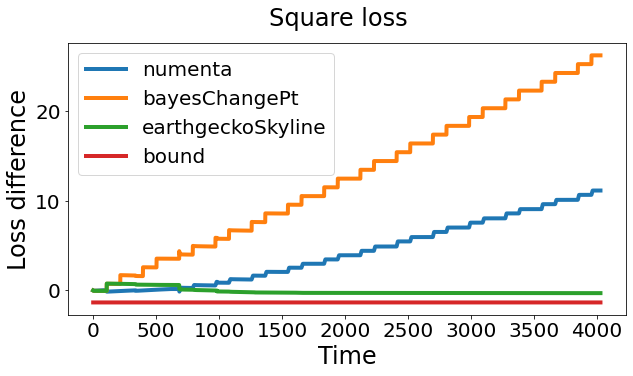

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
for algo_ind in ["numenta", "bayesChangePt", "earthgeckoSkyline"]:
    plt.plot(
        Losses_square_art[f"Loss_{algo_ind}"].values
        - Losses_square_art["Loss_Variable0"].values,
        label=f"{algo_ind}",
        linewidth=4,
    )
axs.plot(np.repeat(-np.log(15) / 2, Losses_log_art.shape[0]), linewidth=4, label="bound")
axs.legend(loc="upper left", fontsize=20)
axs.set_xlabel("Time", fontsize=24)
axs.set_ylabel("Loss difference", fontsize=24)
axs.xaxis.set_tick_params(labelsize=20)
axs.yaxis.set_tick_params(labelsize=20)
fig.suptitle("Square loss", fontsize=24);